In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import RandomOverSampler

In [13]:
df = pd.read_csv("../unsynced-data/lastfm-spotify-merged.csv")
df.head()

,Unnamed: 0,lastfm_id,artist,title,lfm_similars,lfm_tags,spotify_id,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,tempo,mode,manual_check,hot_100
0,0,TRMMMQY128F92F0EA3,Dying Fetus,Ethos of Coercion,"{'TRKGDUE128F92F0E83': 1, 'TRKDLCR128F92F0E7F'...",['metal'],0ghgsfOnoXJT7jsS63U8et,0.000058,0.229,0.9050,0.93400,-6.434,0.0698,0.1770,92.239,1,False,0
1,1,TRMMMBW128F4260CAE,Tiger Lou,Pilots,"{'TRTOWSZ12903CAF431': 1, 'TRCEMBN12903CAF430'...",[],4JMK0ds1Nzd3ysGxHALp64,0.340000,0.533,0.3020,0.17900,-10.308,0.0307,0.2950,134.971,1,False,0
2,2,TRMMMMV128F14746A5,Pierre-Laurent Aimard,Debussy : 12 Etudes : VI Pour les huit doigts,{},[],5hvmBNUVWahl2Cx3zxxJY0,0.993000,0.223,0.0321,0.93400,-30.272,0.0338,0.0598,110.805,1,True,0
3,3,TRMMMOT128F931A571,The Advent,C On,"{'TRXAPWC128F934EF29': 0.972575, 'TRWTVMH12903...",[],5EeJL5A7dNW9mQeSS4BlS0,0.897000,0.623,0.3890,0.00000,-7.043,0.0347,0.4810,94.596,1,True,0
4,4,TRMMMFJ128F92E15AC,Neffa,Passione,"{'TRHYSBJ128F425DB53': 0.147396, 'TRDEZDW128E0...","['ambient', 'blues', 'jazz', 'male vocalist', ...",0gfNb8ILbsRArdOFLTTJXv,0.543000,0.656,0.4520,0.00001,-7.170,0.0262,0.5880,112.962,0,False,0


In [14]:
df = df.drop(["Unnamed: 0", "hot_100", "lastfm_id", "artist", "title", "lfm_similars", "lfm_tags", "spotify_id",
              "manual_check", "mode"], axis=1)
df.head(20)

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,tempo
0,0.000058,0.229,0.9050,0.934000,-6.434,0.0698,0.1770,92.239
1,0.340000,0.533,0.3020,0.179000,-10.308,0.0307,0.2950,134.971
2,0.993000,0.223,0.0321,0.934000,-30.272,0.0338,0.0598,110.805
3,0.897000,0.623,0.3890,0.000000,-7.043,0.0347,0.4810,94.596
4,0.543000,0.656,0.4520,0.000010,-7.170,0.0262,0.5880,112.962
5,0.000001,0.127,0.9660,0.905000,-7.286,0.0788,0.4060,170.117
6,0.281000,0.738,0.2860,0.001430,-15.878,0.0925,0.6110,115.844
7,0.002820,0.801,0.4960,0.831000,-7.959,0.0840,0.5140,124.008
8,0.018300,0.681,0.7350,0.002450,-8.901,0.0534,0.2140,128.018
9,0.345000,0.674,0.7450,0.822000,-11.221,0.0358,0.9720,109.998


In [15]:
# Use instrumentalness as label. Spotify website says an instrumentalness score of below 0.5 is not 
# instrumental while a score above 0.5 is instrumental
df.head()

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,tempo
0,0.000058,0.229,0.9050,0.93400,-6.434,0.0698,0.1770,92.239
1,0.340000,0.533,0.3020,0.17900,-10.308,0.0307,0.2950,134.971
2,0.993000,0.223,0.0321,0.93400,-30.272,0.0338,0.0598,110.805
3,0.897000,0.623,0.3890,0.00000,-7.043,0.0347,0.4810,94.596
4,0.543000,0.656,0.4520,0.00001,-7.170,0.0262,0.5880,112.962


In [16]:
df["instrumental"] = df["instrumentalness"].apply(lambda x: 0 if x <= 0.5 else 1)
df_inst = df.copy()
df_inst.head(20)

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,tempo,instrumental
0,0.000058,0.229,0.9050,0.934000,-6.434,0.0698,0.1770,92.239,1
1,0.340000,0.533,0.3020,0.179000,-10.308,0.0307,0.2950,134.971,0
2,0.993000,0.223,0.0321,0.934000,-30.272,0.0338,0.0598,110.805,1
3,0.897000,0.623,0.3890,0.000000,-7.043,0.0347,0.4810,94.596,0
4,0.543000,0.656,0.4520,0.000010,-7.170,0.0262,0.5880,112.962,0
5,0.000001,0.127,0.9660,0.905000,-7.286,0.0788,0.4060,170.117,1
6,0.281000,0.738,0.2860,0.001430,-15.878,0.0925,0.6110,115.844,0
7,0.002820,0.801,0.4960,0.831000,-7.959,0.0840,0.5140,124.008,1
8,0.018300,0.681,0.7350,0.002450,-8.901,0.0534,0.2140,128.018,0
9,0.345000,0.674,0.7450,0.822000,-11.221,0.0358,0.9720,109.998,1


In [17]:
df_inst = df_inst.drop(["instrumentalness"], axis=1)
df_inst.head(20)

,acousticness,danceability,energy,loudness,speechiness,valence,tempo,instrumental
0,0.000058,0.229,0.9050,-6.434,0.0698,0.1770,92.239,1
1,0.340000,0.533,0.3020,-10.308,0.0307,0.2950,134.971,0
2,0.993000,0.223,0.0321,-30.272,0.0338,0.0598,110.805,1
3,0.897000,0.623,0.3890,-7.043,0.0347,0.4810,94.596,0
4,0.543000,0.656,0.4520,-7.170,0.0262,0.5880,112.962,0
5,0.000001,0.127,0.9660,-7.286,0.0788,0.4060,170.117,1
6,0.281000,0.738,0.2860,-15.878,0.0925,0.6110,115.844,0
7,0.002820,0.801,0.4960,-7.959,0.0840,0.5140,124.008,1
8,0.018300,0.681,0.7350,-8.901,0.0534,0.2140,128.018,0
9,0.345000,0.674,0.7450,-11.221,0.0358,0.9720,109.998,1


In [18]:
df_inst.drop("instrumental", axis=1)

,acousticness,danceability,energy,loudness,speechiness,valence,tempo
0,0.000058,0.229,0.9050,-6.434,0.0698,0.1770,92.239
1,0.340000,0.533,0.3020,-10.308,0.0307,0.2950,134.971
2,0.993000,0.223,0.0321,-30.272,0.0338,0.0598,110.805
3,0.897000,0.623,0.3890,-7.043,0.0347,0.4810,94.596
4,0.543000,0.656,0.4520,-7.170,0.0262,0.5880,112.962
...,...,...,...,...,...,...,...
152724,0.788000,0.772,0.4340,-13.834,0.0680,0.9400,126.514
152725,0.009460,0.476,0.9020,-7.701,0.0716,0.3710,147.555
152726,0.012800,0.513,0.6510,-7.120,0.0360,0.3510,151.845
152727,0.684000,0.334,0.1360,-20.145,0.0369,0.1640,105.034


<Axes: xlabel='instrumental', ylabel='count'>

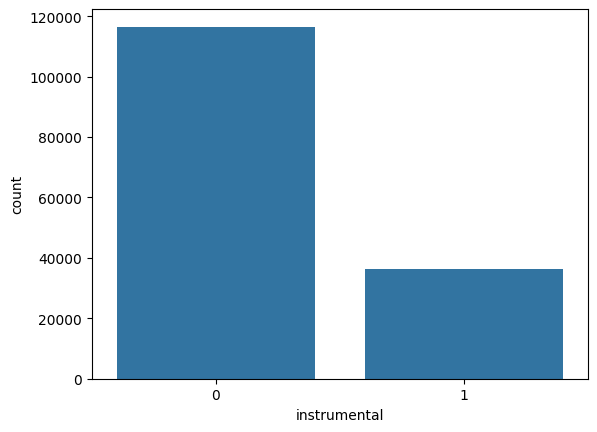

In [19]:
df_labels = df_inst["instrumental"]
df_data = df_inst.drop("instrumental", axis=1)
sns.countplot(x=df_labels)

<Axes: xlabel='instrumental', ylabel='count'>

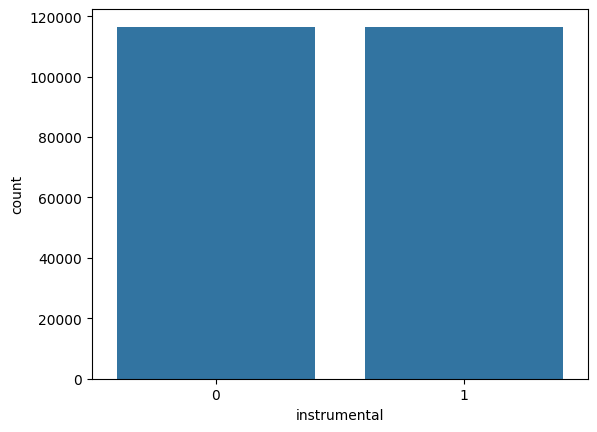

In [20]:
# Use RandomOverSampler (from imblearn) to balance the data
samp = RandomOverSampler()
samp_data, samp_labels = samp.fit_resample(df_data, df_labels)
sns.countplot(x=samp_labels)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(samp_data, samp_labels)
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
x_train

,acousticness,danceability,energy,loudness,speechiness,valence,tempo
172866,0.800000,0.417,0.134,-17.173,0.0394,0.174,77.931
217195,0.953000,0.103,0.194,-15.343,0.0386,0.211,63.143
141498,0.106000,0.667,0.495,-10.294,0.0299,0.783,141.301
10983,0.073300,0.715,0.808,-6.860,0.0455,0.934,79.991
96253,0.003030,0.426,0.877,-4.801,0.0622,0.852,191.894
...,...,...,...,...,...,...,...
39297,0.000354,0.553,0.882,-5.261,0.0385,0.423,125.002
167559,0.199000,0.086,0.959,-2.617,0.0745,0.610,191.021
142513,0.000023,0.272,0.964,-7.574,0.0525,0.592,114.910
174356,0.866000,0.631,0.399,-12.730,0.0379,0.591,118.827


In [23]:
x_test

,acousticness,danceability,energy,loudness,speechiness,valence,tempo
92597,0.007520,0.280,0.9480,-4.211,0.2280,0.471,151.919
158844,0.945000,0.411,0.1270,-25.829,0.0328,0.214,100.917
99836,0.000244,0.439,0.6760,-7.179,0.0284,0.307,90.946
124156,0.995000,0.391,0.0624,-16.143,0.0394,0.104,66.821
183726,0.002030,0.744,0.6850,-8.088,0.0751,0.459,135.037
...,...,...,...,...,...,...,...
166080,0.676000,0.336,0.7450,-8.841,0.0645,0.161,100.482
100353,0.064200,0.500,0.7350,-6.821,0.1590,0.346,75.667
63712,0.031100,0.579,0.6050,-7.555,0.0353,0.782,86.589
29415,0.630000,0.766,0.5290,-9.890,0.0479,0.398,112.052


In [24]:
y_train

172866    1
217195    1
141498    0
10983     0
96253     0
         ..
39297     0
167559    1
142513    0
174356    1
130835    0
Name: instrumental, Length: 174766, dtype: int64

In [25]:
y_test

92597     0
158844    1
99836     0
124156    0
183726    1
         ..
166080    1
100353    0
63712     0
29415     0
35070     1
Name: instrumental, Length: 58256, dtype: int64

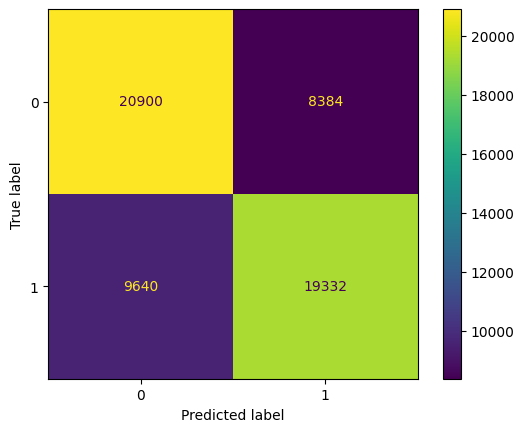

In [26]:
y_pred = log_reg.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

In [27]:
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accur = accuracy_score(y_test, y_pred)
results_df = pd.DataFrame(columns=["Precision", "Recall", "F1", "Accuracy", "model"])
results_df.loc[0] = [prec, recall, f1, accur, "Logistic Regression"]

In [28]:
# Run MN Naive Bayes
from sklearn.naive_bayes import GaussianNB as NB

nb = NB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accur = accuracy_score(y_test, y_pred)
results_df.loc[0] = [prec, recall, f1, accur, "Naive Bayes"]

In [29]:
results_df.set_index("model")

,Precision,Recall,F1,Accuracy
model,,,,
Naive Bayes,0.617861,0.639997,0.628734,0.624107


In [30]:
from sklearn.tree import DecisionTreeClassifier

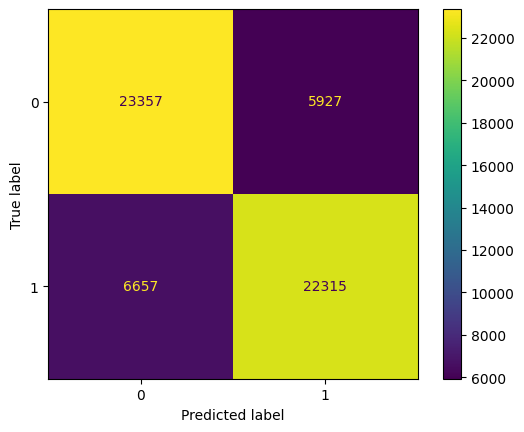

In [31]:
tree = DecisionTreeClassifier(max_depth=15)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accur = accuracy_score(y_test, y_pred)
results_df.loc[0] = [prec, recall, f1, accur, "Decision Tree"]

In [32]:
tree.get_depth()

15

In [33]:
results_df.set_index("model")

,Precision,Recall,F1,Accuracy
model,,,,
Decision Tree,0.790135,0.770226,0.780054,0.783988


In [38]:
# Test different tree depths
depth = tree.get_depth()
depth = 15

In [39]:
depths = np.arange(1, depth + 1)

d_tree_df = pd.DataFrame(columns = ["train_accuracy", "test_accuracy", "Depth"])

for d in depths:
    print(d)
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(x_train, y_train)
    y_pred_train = tree.predict(x_train)
    y_pred_test = tree.predict(x_test)
    f1_train = accuracy_score(y_train, y_pred_train)
    f1_test = accuracy_score(y_test, y_pred_test)
    d_tree_df.loc[d-1] = [f1_train, f1_test, d]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [40]:
d_tree_df.set_index("Depth")

,train_accuracy,test_accuracy
Depth,,
1.0,0.593353,0.593381
2.0,0.604282,0.602822
3.0,0.649783,0.647453
4.0,0.678599,0.674334
5.0,0.688498,0.683140
6.0,0.691919,0.687140
7.0,0.708679,0.704769
8.0,0.718441,0.710365
9.0,0.733959,0.724543


ValueError: x and y must be the same size

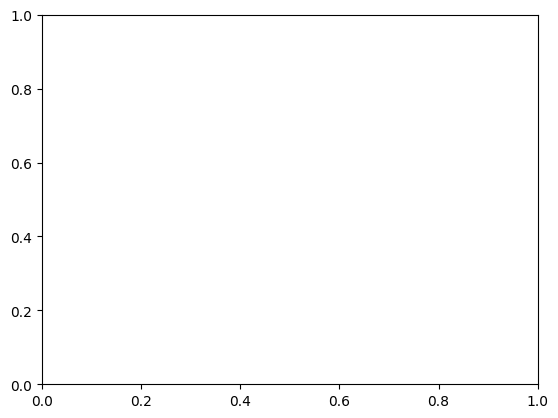

In [37]:
plt.scatter(d_tree_df["Depth"], d_tree_df["train_accuracy"][:15])
plt.scatter(d_tree_df["Depth"][:15], d_tree_df["test_accuracy"][:15])